In [19]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
def is_cat(x):
    return x[0].isupper()

In [4]:
dls = ImageDataLoaders.from_name_func(path/'images', get_image_files(path/'images'), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224), bs=4, num_workers=4)

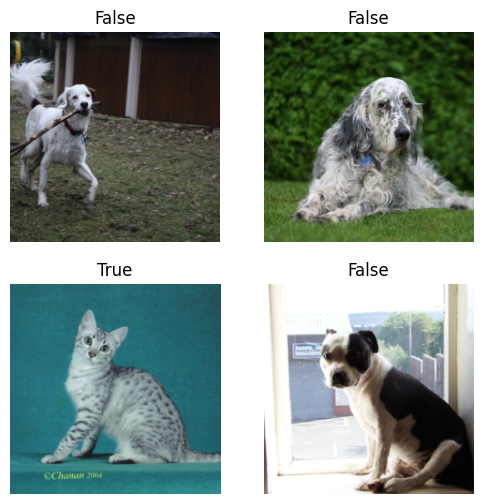

In [5]:
dls.show_batch(max_n=6)

In [6]:
learn = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()

In [26]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.198266,0.331827,0.922192,01:35


epoch,train_loss,valid_loss,accuracy,time
0,0.172330,0.190650,0.961434,01:48
1,0.163526,0.306630,0.887686,01:49
2,0.094636,0.055934,0.986468,01:50
3,0.050304,0.077049,0.975643,01:51
4,0.042489,0.082915,0.976319,01:52


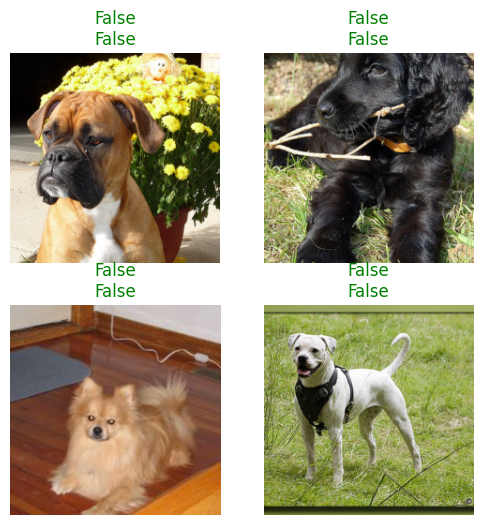

In [30]:
learn.show_results()

In [31]:
learn.validate()

[0.0829152911901474, 0.9763193726539612]

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

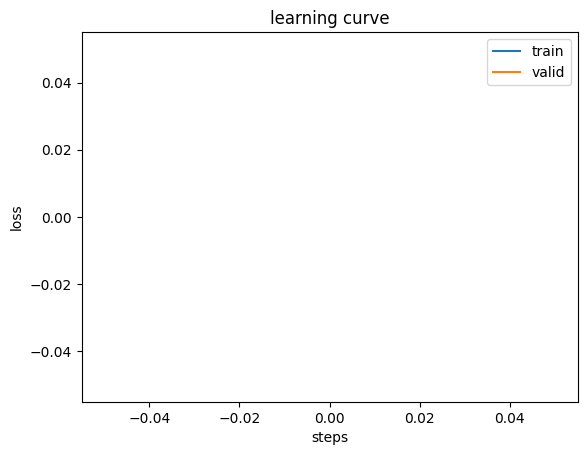

In [32]:
learn.recorder.plot_loss()

In [33]:
img = PILImage.create("test.jpg")
pred,pred_idx,probs = learn.predict(img)
print(f"Predicted: {pred}, Probability: {probs[pred_idx]:.2f}")

Predicted: True, Probability: 0.97


In [34]:
learn.export("dog_cat_model.pkl")